In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from data import HFFH_ViT_Data
from loss import Loss
from model import  HFFH_ViT, HFFH_ViT_S
from trainer import Trainer
from saved import Saver

In [2]:
print(torch.cuda.get_device_name(0))

args = {}
# model
args['precision'] = "single"
args['device'] = torch.device("cuda:0")
args['image_size'] = (256, 256)
args['patch_size'] = (16, 16)
args['dims'] = [8, 8, 16]
#args['dims'] = [96, 120, 144]
#the last channel argument determines the amount of output channels. SET = 1
args['channels'] = [16, 16, 16, 16, 16, 16, 16, 16, 32, 32, 1]
#args['channels'] = 16
#args['channels'] = [16, 32, 48, 48, 64, 64, 80, 80, 96, 96, 1]
args['expansion'] = 1
args['kernel_size'] = 3
args['depths'] = (2, 4, 3)
args['in_channels'] = 1

# loss function
args['loss'] = "1*L1"  # loss functions separated by '+', each loss function has [weight]*[loss_type]

# trainer
args['optimizer'] = "ADAM"
args['lr'] = 1e-4
args['weight_decay'] = 0
#args['decay'] = "10-20-30-50-75-100-150-200"   # Decay milestones
args['decay'] = "30"   # Decay milestones
args['gamma'] = 0.5     # Decay factor at each milestone
args['betas'] = (0.9, 0.999)
args['epsilon'] = 1e-8
args['print_every'] = 0 # 0 = never
args['epochs'] = 1e8
args['batch_size'] = 2

NVIDIA GeForce RTX 3090


In [3]:
d = HFFH_ViT_Data(args)
#d.create_train_dataset()
#d.create_test_dataset()
d.Load("./data/data4096_w_test256.hffh")

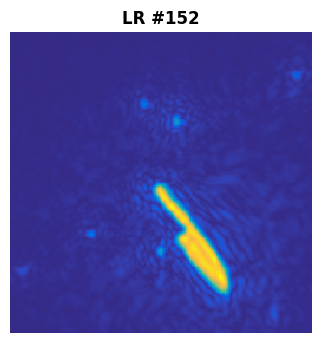

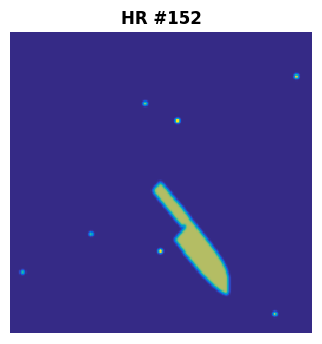

In [4]:
d.preview()

In [5]:
m = HFFH_ViT(args)
l = Loss(args)
t = Trainer(args, d, m, l)

m.num_params()

Created HFFH_ViT Model
Preparing complex loss function...
	1.000 * L1
Making the trainer...


69122

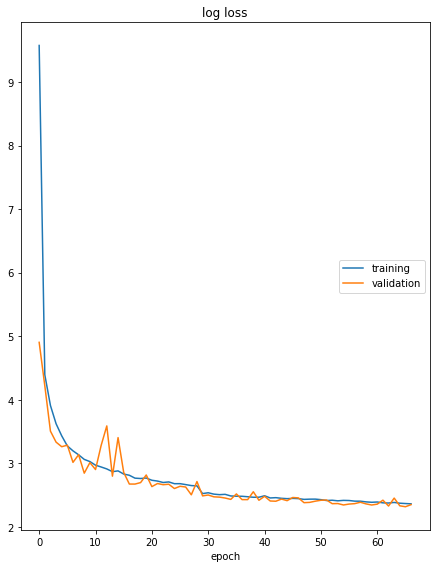

log loss
	training         	 (min:    2.362, max:    9.574, cur:    2.362)
	validation       	 (min:    2.317, max:    4.903, cur:    2.350)


KeyboardInterrupt: 

In [15]:
# train the model
while not t.terminate():
    t.train()

In [19]:
d.test_net_quant(m, args)

FFH  PSNR: 22.123
FFH  RMSE: 0.083
OURS PSNR: 36.869
OURS RMSE: 0.015
BPA  PSNR: 26.331
BPA  RMSE: 0.044
RMA  PSNR: 10.158
RMA  RMSE: 0.276


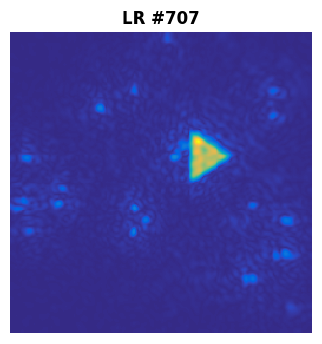

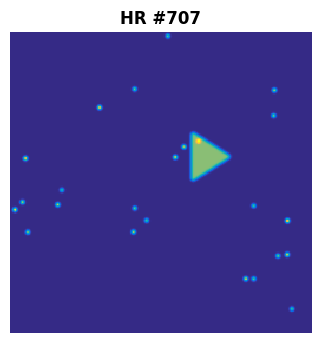

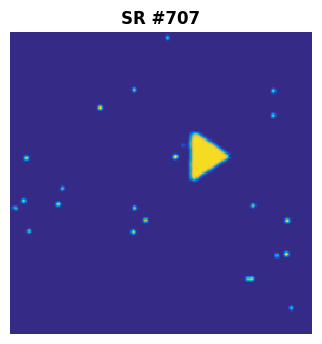

In [6]:
d.test_net(m, args, 707)

In [ ]:
d.preview()

In [5]:
s = Saver()
args, m, l, t = s.Load(d, HFFH_ViT, Loss, Trainer, "./saved/hffh_ViT_v31.tar")

Created HFFH_ViT Model
Making the trainer...
Loaded model from: ./saved/hffh_ViT_v31.tar


In [ ]:
l.plot_loss("./", 350)

In [16]:
s = Saver()
s.Save(args, m, l, t, "./saved/hffh_ViT_v31.tar")

Saved model to: ./saved/hffh_ViT_v31.tar


In [9]:
torch.cuda.empty_cache()

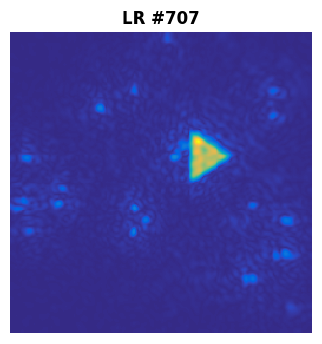

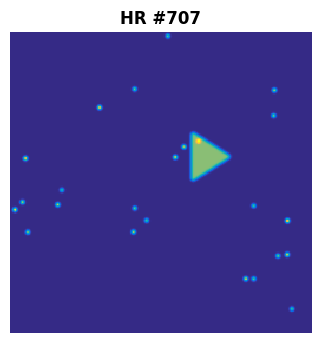

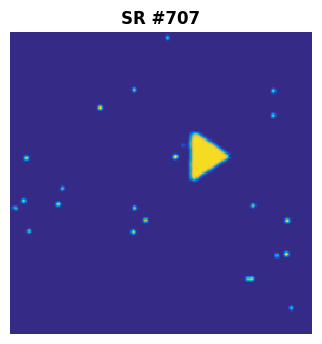

In [7]:
d.test_net(m, args, 707, save_name="test707")

In [8]:
d.test_net_real(m, args, "exp1_cutout2_2", save_name="test_exp1")

C:\Users\josia\AppData\Local\Programs\Python\Python39\lib\site-packages\torchvision\transforms\functional_tensor.py:617: UserWarning: Casting complex values to real discards the imaginary part (Triggered internally at  ..\aten\src\ATen\native\Copy.cpp:244.)
  img = img.to(req_dtype)


ValueError: cannot reshape array of size 40000 into shape (1,1,256,256)